#### Import Required Libraries

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Load Dataset

In [3]:
df = pd.read_csv("emotion_sentiment_dataset.csv")

df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


#### Class Distribution

In [4]:
print(df['Emotion'].value_counts())

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64


#### Text Preprocessing

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,Unnamed: 0,text,Emotion,clean_text
0,0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...
1,1,im so full of life i feel appalled,neutral,im full life feel appalled
2,2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feeling think afraid accep...
3,3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trusting fi...
4,4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...


#### Encode Emotion Labels

In [6]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Emotion'])

df[['Emotion', 'label']].drop_duplicates()

,Emotion,label
0,hate,6
1,neutral,8
3,anger,0
5,love,7
7,worry,12
22,relief,9
31,happiness,5
37,fun,4
42,empty,2
169,enthusiasm,3


#### Train–Test Split

In [7]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### TF-IDF Feature Extraction

In [8]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Model Training (Logistic Regression)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

#### Model Evaluation

In [10]:
y_pred = model.predict(X_test_tfidf)

train_pred = model.predict(X_train_tfidf)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Training Accuracy: 0.9934623103906236
Testing Accuracy : 0.992805712550101

Classification Report:

              precision    recall  f1-score   support

       anger       0.99      0.94      0.96      2467
     boredom       1.00      0.80      0.89        25
       empty       1.00      0.94      0.97      1108
  enthusiasm       1.00      0.97      0.98      1861
         fun       0.99      0.91      0.95      2015
   happiness       0.99      0.99      0.99      5435
        hate       0.99      0.98      0.98      3053
        love       0.99      0.98      0.99      7911
     neutral       0.99      1.00      1.00    134908
      relief       0.99      0.95      0.97      3346
     sadness       1.00      0.96      0.98      3496
    surprise       1.00      0.97      0.98      1391
       worry       0.95      0.92      0.94       895

    accuracy                           0.99    167911
   macro avg       0.99      0.95      0.97    167911
weighted avg       0.99      0.99 

#### Confusion Matrix

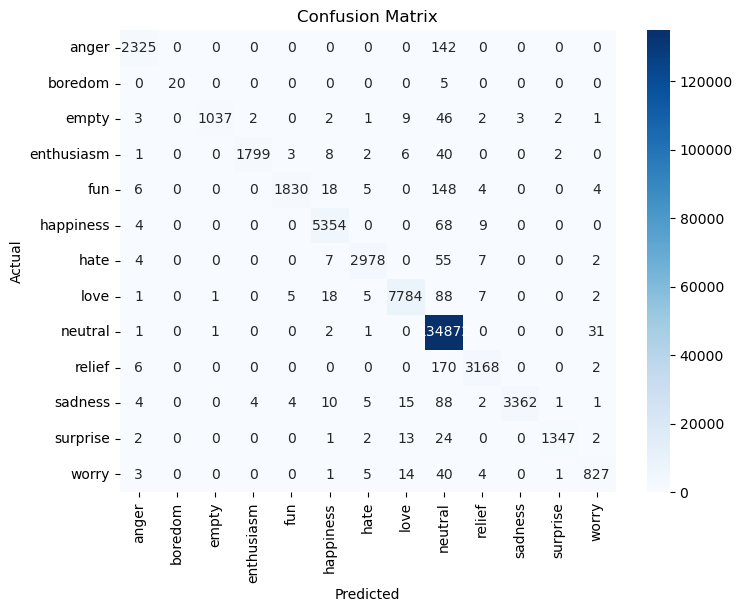

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Emotion Prediction Function

In [12]:
def predict_emotion(text):
    cleaned = preprocess_text(text)
    vector = tfidf.transform([cleaned])
    pred_label = model.predict(vector)[0]
    return label_encoder.inverse_transform([pred_label])[0]

In [13]:
sentences = [
    "I feel extremely angry and betrayed",
    "I love being with my family",
    "I am worried about my future",
    "Nothing special happened today",
    "it was so much fun"
]

for s in sentences:
    print(f"Text: {s}")
    print(f"Predicted Emotion: {predict_emotion(s)}\n")

Text: I feel extremely angry and betrayed
Predicted Emotion: anger

Text: I love being with my family
Predicted Emotion: love

Text: I am worried about my future
Predicted Emotion: neutral

Text: Nothing special happened today
Predicted Emotion: neutral

Text: it was so much fun
Predicted Emotion: fun



#### Save Model

In [14]:
import pickle

with open("emotion_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)